In [ ]:
import os
import sys
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

sys.path.append(os.path.abspath('..'))
from src.utils.seed import set_seed
from src.utils.config import Config
from src.preprocessing import get_data_loaders
from src.models import LogisticRegression
from src.evaluation import calculate_metrics, Plotter

set_seed(42)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Device: {device}")

c:\Users\surya\anaconda3\envs\tf-gpu\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Device: cuda


In [2]:
config = Config('../configs/config.yaml')
train_loader, val_loader, test_loader, input_dim = get_data_loaders(config)

print(f"Input Features: {input_dim}")
print(f"Train Samples: {len(train_loader.dataset)}")
print(f"Val Samples: {len(val_loader.dataset)}")
print(f"Test Samples: {len(test_loader.dataset)}")

Input Features: 7
Train Samples: 130812
Val Samples: 18688
Test Samples: 37376


In [3]:
model = LogisticRegression(input_dim=input_dim).to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=config.training['learning_rate'])

print(f"Model: {model}")
print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")

Model: LogisticRegression(
  (linear): Linear(in_features=7, out_features=1, bias=True)
)
Parameters: 8


In [4]:
epochs = config.training['epochs']
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}")
    for X_batch, y_batch in progress_bar:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device).float().unsqueeze(1)
        
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        progress_bar.set_postfix({'loss': f'{loss.item():.4f}'})
    
    avg_train_loss = train_loss / len(train_loader)
    
    model.eval()
    val_loss = 0.0
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device).float().unsqueeze(1)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            
            probs = torch.sigmoid(outputs)
            all_labels.extend(y_batch.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    avg_val_loss = val_loss / len(val_loader)
    val_metrics = calculate_metrics(np.array(all_labels), np.array(all_probs))
    
    train_losses.append(avg_train_loss)
    val_losses.append(avg_val_loss)
    val_aucs.append(val_metrics['auc'])
    
    print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val AUC: {val_metrics['auc']:.4f}")

print("\n✓ Training Complete!")

Epoch 1/50: 100%|██████████| 4088/4088 [00:13<00:00, 293.31it/s, loss=0.0571]


Epoch 1/50 - Train Loss: 0.1868, Val Loss: 0.0701, Val AUC: 0.9989


Epoch 2/50: 100%|██████████| 4088/4088 [00:10<00:00, 398.99it/s, loss=0.0136]


Epoch 2/50 - Train Loss: 0.0517, Val Loss: 0.0412, Val AUC: 0.9991


Epoch 3/50: 100%|██████████| 4088/4088 [00:09<00:00, 444.71it/s, loss=0.0038]


Epoch 3/50 - Train Loss: 0.0373, Val Loss: 0.0353, Val AUC: 0.9992


Epoch 4/50: 100%|██████████| 4088/4088 [00:08<00:00, 463.80it/s, loss=0.0098]


Epoch 4/50 - Train Loss: 0.0340, Val Loss: 0.0338, Val AUC: 0.9992


Epoch 5/50: 100%|██████████| 4088/4088 [00:09<00:00, 449.14it/s, loss=0.0066]


Epoch 5/50 - Train Loss: 0.0330, Val Loss: 0.0332, Val AUC: 0.9992


Epoch 6/50: 100%|██████████| 4088/4088 [00:10<00:00, 408.44it/s, loss=0.0005]


Epoch 6/50 - Train Loss: 0.0325, Val Loss: 0.0330, Val AUC: 0.9992


Epoch 7/50: 100%|██████████| 4088/4088 [00:17<00:00, 237.12it/s, loss=0.0544]


Epoch 7/50 - Train Loss: 0.0323, Val Loss: 0.0328, Val AUC: 0.9992


Epoch 8/50: 100%|██████████| 4088/4088 [00:18<00:00, 226.86it/s, loss=0.0790]


Epoch 8/50 - Train Loss: 0.0321, Val Loss: 0.0328, Val AUC: 0.9992


Epoch 9/50: 100%|██████████| 4088/4088 [00:12<00:00, 333.06it/s, loss=0.0556]


Epoch 9/50 - Train Loss: 0.0321, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 10/50: 100%|██████████| 4088/4088 [00:12<00:00, 336.70it/s, loss=0.0117]


Epoch 10/50 - Train Loss: 0.0320, Val Loss: 0.0327, Val AUC: 0.9993


Epoch 11/50: 100%|██████████| 4088/4088 [00:11<00:00, 348.64it/s, loss=0.0226]


Epoch 11/50 - Train Loss: 0.0320, Val Loss: 0.0327, Val AUC: 0.9993


Epoch 12/50: 100%|██████████| 4088/4088 [00:11<00:00, 364.15it/s, loss=0.0840]


Epoch 12/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9992


Epoch 13/50: 100%|██████████| 4088/4088 [00:11<00:00, 354.38it/s, loss=0.0579]


Epoch 13/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 14/50: 100%|██████████| 4088/4088 [00:11<00:00, 353.01it/s, loss=0.0471]


Epoch 14/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 15/50: 100%|██████████| 4088/4088 [00:12<00:00, 337.02it/s, loss=0.1161]


Epoch 15/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 16/50: 100%|██████████| 4088/4088 [00:10<00:00, 395.01it/s, loss=0.0035]


Epoch 16/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 17/50: 100%|██████████| 4088/4088 [00:09<00:00, 445.18it/s, loss=0.0236]


Epoch 17/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 18/50: 100%|██████████| 4088/4088 [00:09<00:00, 439.43it/s, loss=0.1236]


Epoch 18/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 19/50: 100%|██████████| 4088/4088 [00:10<00:00, 394.10it/s, loss=0.0015]


Epoch 19/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 20/50: 100%|██████████| 4088/4088 [00:09<00:00, 452.68it/s, loss=0.0050]


Epoch 20/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 21/50: 100%|██████████| 4088/4088 [00:08<00:00, 458.39it/s, loss=0.0014]


Epoch 21/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 22/50: 100%|██████████| 4088/4088 [00:09<00:00, 428.19it/s, loss=0.0232]


Epoch 22/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 23/50: 100%|██████████| 4088/4088 [00:09<00:00, 453.94it/s, loss=0.1065]


Epoch 23/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 24/50: 100%|██████████| 4088/4088 [00:08<00:00, 470.84it/s, loss=0.0017]


Epoch 24/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 25/50: 100%|██████████| 4088/4088 [00:09<00:00, 434.03it/s, loss=0.1007]


Epoch 25/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 26/50: 100%|██████████| 4088/4088 [00:10<00:00, 389.83it/s, loss=0.0004]


Epoch 26/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 27/50: 100%|██████████| 4088/4088 [00:09<00:00, 438.91it/s, loss=0.0117]


Epoch 27/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 28/50: 100%|██████████| 4088/4088 [00:09<00:00, 443.84it/s, loss=0.2376]


Epoch 28/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 29/50: 100%|██████████| 4088/4088 [00:09<00:00, 435.54it/s, loss=0.0121]


Epoch 29/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 30/50: 100%|██████████| 4088/4088 [00:09<00:00, 440.49it/s, loss=0.0057]


Epoch 30/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 31/50: 100%|██████████| 4088/4088 [00:09<00:00, 414.26it/s, loss=0.0037]


Epoch 31/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9992


Epoch 32/50: 100%|██████████| 4088/4088 [00:09<00:00, 414.28it/s, loss=0.0784]


Epoch 32/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 33/50: 100%|██████████| 4088/4088 [00:08<00:00, 455.50it/s, loss=0.1100]


Epoch 33/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 34/50: 100%|██████████| 4088/4088 [00:08<00:00, 462.02it/s, loss=0.0481]


Epoch 34/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 35/50: 100%|██████████| 4088/4088 [00:09<00:00, 447.19it/s, loss=0.0011]


Epoch 35/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 36/50: 100%|██████████| 4088/4088 [00:09<00:00, 426.52it/s, loss=0.0241]


Epoch 36/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 37/50: 100%|██████████| 4088/4088 [00:09<00:00, 434.16it/s, loss=0.0012]


Epoch 37/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 38/50: 100%|██████████| 4088/4088 [00:09<00:00, 443.61it/s, loss=0.0324]


Epoch 38/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 39/50: 100%|██████████| 4088/4088 [00:08<00:00, 457.56it/s, loss=0.0514]


Epoch 39/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 40/50: 100%|██████████| 4088/4088 [00:09<00:00, 453.61it/s, loss=0.0291]


Epoch 40/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 41/50: 100%|██████████| 4088/4088 [00:09<00:00, 430.04it/s, loss=0.0249]


Epoch 41/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 42/50: 100%|██████████| 4088/4088 [00:08<00:00, 484.74it/s, loss=0.0010]


Epoch 42/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 43/50: 100%|██████████| 4088/4088 [00:09<00:00, 449.63it/s, loss=0.0457]


Epoch 43/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 44/50: 100%|██████████| 4088/4088 [02:12<00:00, 30.83it/s, loss=0.0352] 


Epoch 44/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 45/50: 100%|██████████| 4088/4088 [00:09<00:00, 416.88it/s, loss=0.0026]


Epoch 45/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 46/50: 100%|██████████| 4088/4088 [00:09<00:00, 443.51it/s, loss=0.0334]


Epoch 46/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 47/50: 100%|██████████| 4088/4088 [00:10<00:00, 408.09it/s, loss=0.0058]


Epoch 47/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 48/50: 100%|██████████| 4088/4088 [00:09<00:00, 431.21it/s, loss=0.0021]


Epoch 48/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 49/50: 100%|██████████| 4088/4088 [00:09<00:00, 438.95it/s, loss=0.0032]


Epoch 49/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993


Epoch 50/50: 100%|██████████| 4088/4088 [00:16<00:00, 240.79it/s, loss=0.0218]


Epoch 50/50 - Train Loss: 0.0320, Val Loss: 0.0328, Val AUC: 0.9993

✓ Training Complete!


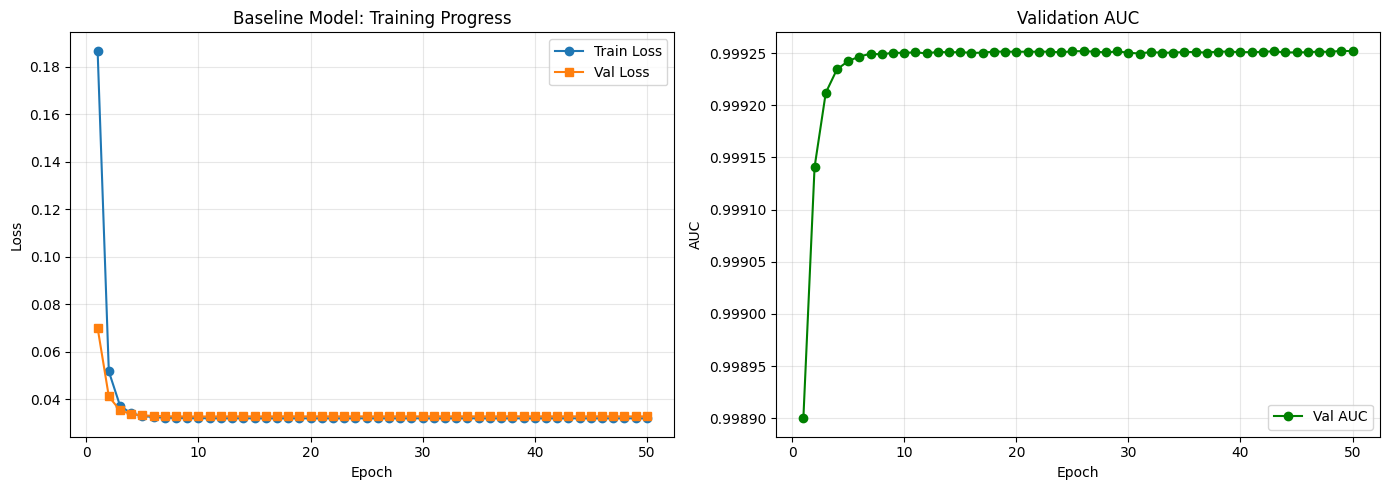

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o')
axes[0].plot(range(1, epochs+1), val_losses, label='Val Loss', marker='s')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Baseline Model: Training Progress')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, epochs+1), val_aucs, label='Val AUC', marker='o', color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('AUC')
axes[1].set_title('Validation AUC')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [6]:
model.eval()
all_preds = []
all_probs = []
all_labels = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch = X_batch.to(device)
        outputs = model(X_batch)
        probs = torch.sigmoid(outputs).cpu().numpy()
        
        all_probs.extend(probs.flatten())
        all_labels.extend(y_batch.numpy())

all_probs = np.array(all_probs)
all_labels = np.array(all_labels)

test_metrics = calculate_metrics(all_labels, all_probs)

print("Baseline Model Test Results:")
for metric, value in test_metrics.items():
    print(f"  {metric.upper()}: {value:.4f}")

Baseline Model Test Results:
  ACCURACY: 0.9881
  PRECISION: 0.9858
  RECALL: 0.9884
  F1: 0.9871
  AUC: 0.9993


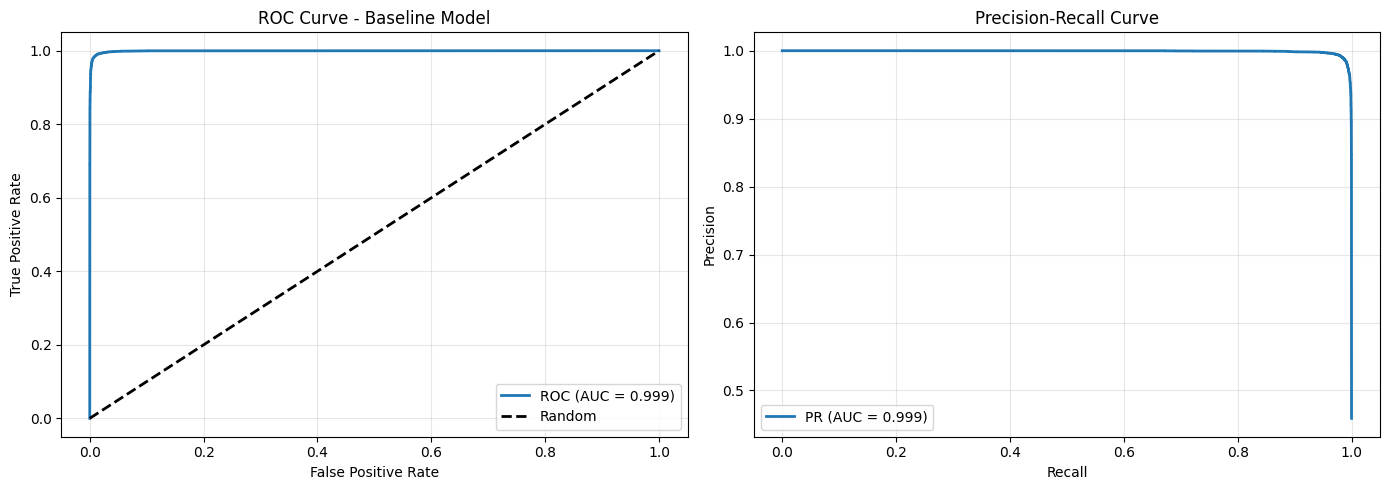

In [7]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

fpr, tpr, _ = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

precision, recall, _ = precision_recall_curve(all_labels, all_probs)
pr_auc = auc(recall, precision)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(fpr, tpr, lw=2, label=f'ROC (AUC = {roc_auc:.3f})')
axes[0].plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('ROC Curve - Baseline Model')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(recall, precision, lw=2, label=f'PR (AUC = {pr_auc:.3f})')
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title('Precision-Recall Curve')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
os.makedirs('../reports/results/checkpoints', exist_ok=True)
torch.save(model.state_dict(), '../reports/results/checkpoints/baseline_model.pth')
print("✓ Model saved to: reports/results/checkpoints/baseline_model.pth")

✓ Model saved to: reports/results/checkpoints/baseline_model.pth
